In [1]:
! pip install lazypredict


  Obtaining dependency information for lazypredict from https://files.pythonhosted.org/packages/bb/df/936639581c018ac59b1096d34e42d39e967d97bf09b1fdb1645e64852e36/lazypredict-0.2.12-py2.py3-none-any.whl.metadata
  Using cached lazypredict-0.2.12-py2.py3-none-any.whl.metadata (12 kB)
  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/11/3f/49913ed111286e23bcc40daab54542d80924264dca8ae371514039ab83ab/lightgbm-4.5.0-py3-none-macosx_12_0_arm64.whl.metadata
  Using cached lightgbm-4.5.0-py3-none-macosx_12_0_arm64.whl.metadata (17 kB)
Using cached lazypredict-0.2.12-py2.py3-none-any.whl (12 kB)
Using cached lightgbm-4.5.0-py3-none-macosx_12_0_arm64.whl (1.6 MB)


In [2]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [3]:
df = pd.read_csv('/Users/raysonfernandes/Desktop/project/polymerase_basic_protein2_(PB2)_06_bioactivity_data_3class_pEC50_pubchem_fp.csv')

In [5]:
X = df.drop('pEC50', axis=1)
Y = df.pEC50

In [6]:
X.shape

(33, 881)

In [7]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(33, 37)

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:01<00:00, 41.99it/s]


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 26, number of used features: 0
[LightGBM] [Info] Start training from score 8.011163
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

100%|██████████| 42/42 [00:00<00:00, 45.32it/s]

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 26, number of used features: 0
[LightGBM] [Info] Start training from score 8.011163
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the spli

In [10]:
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
KernelRidge,129.27,-60.57,8.03,0.01
Lars,17.24,-6.79,2.86,0.02
QuantileRegressor,3.08,-0.00,1.02,0.01
LGBMRegressor,3.08,-0.00,1.02,0.01
HistGradientBoostingRegressor,3.08,0.00,1.02,0.15
Lasso,3.08,0.00,1.02,0.01
LassoLars,3.08,0.00,1.02,0.00
DummyRegressor,3.08,0.00,1.02,0.00
ElasticNet,2.80,0.14,0.95,0.00


In [11]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,18282290009219382794537402368.00,-94458498380966808173078904832.00,288059135374189.81,0.01
KernelRidge,19.82,-96.25,9.24,0.00
GaussianProcessRegressor,13.72,-64.70,7.60,0.00
MLPRegressor,2.06,-4.49,2.20,0.02
LinearRegression,1.97,-4.00,2.10,0.00
TransformedTargetRegressor,1.97,-4.00,2.10,0.00
LinearSVR,1.81,-3.21,1.92,0.00
HuberRegressor,1.73,-2.76,1.82,0.02
PassiveAggressiveRegressor,1.66,-2.41,1.73,0.00


[(0.0, 1.0)]

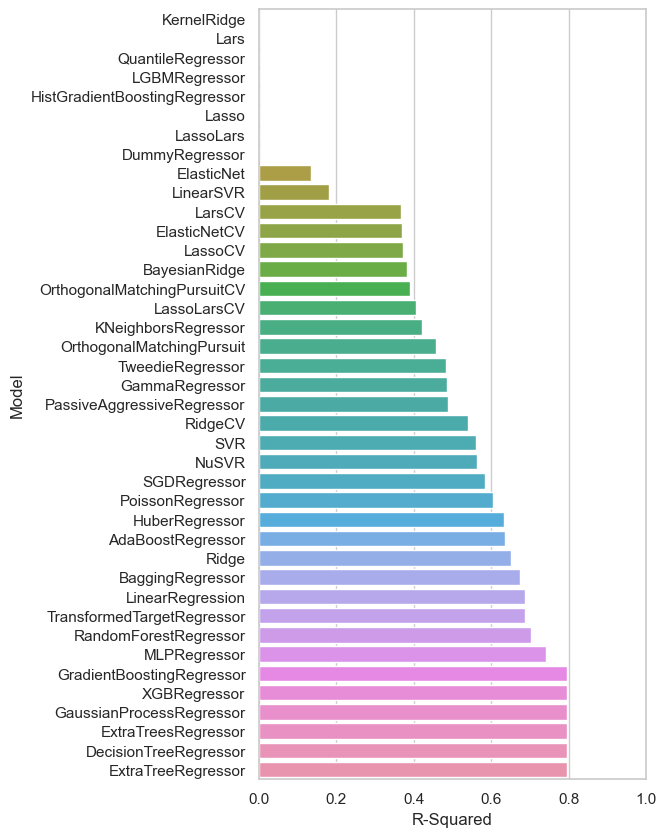

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

[(0.0, 10.0)]

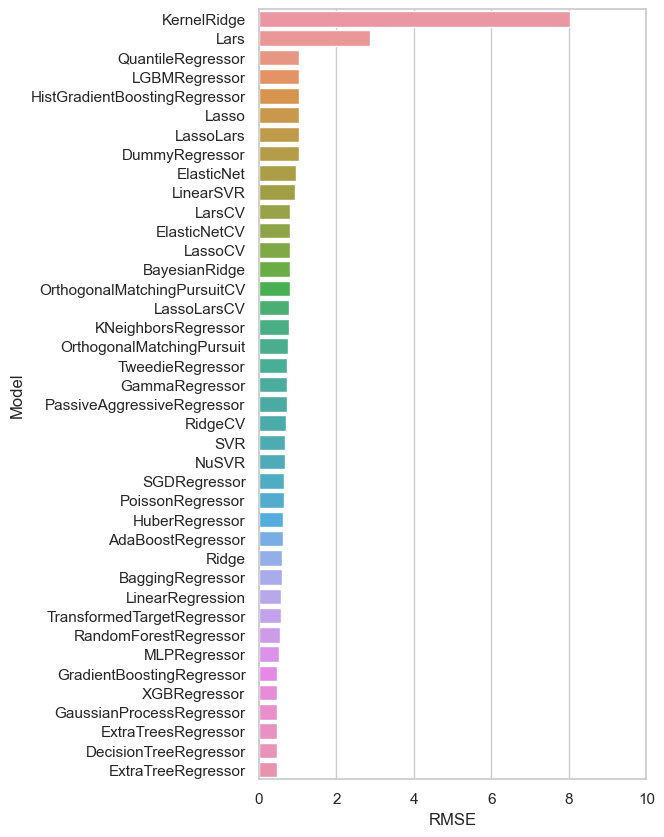

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

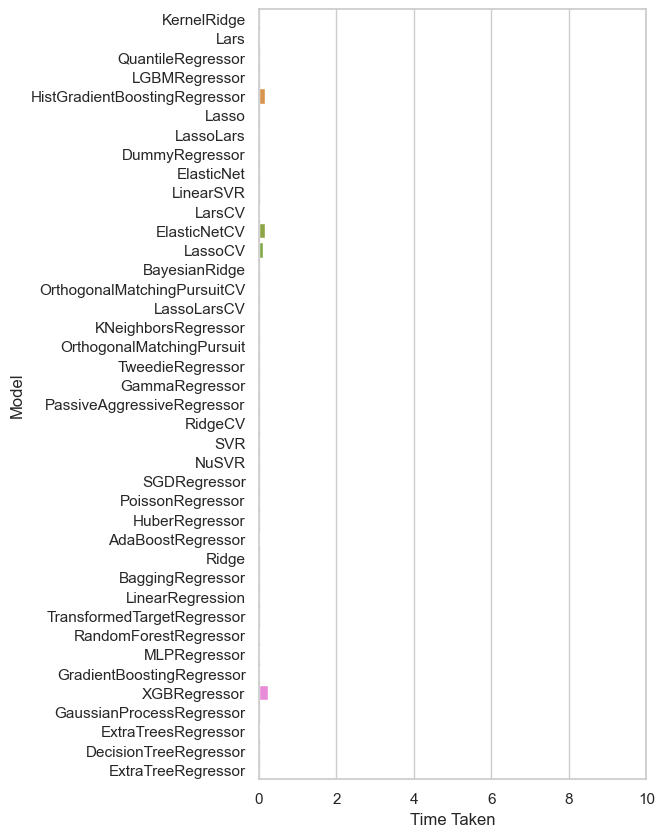

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))